## Heart disease using 8 machine learning algorithms :
1. Linear Regression        --      61.92
2. Logistic Regression      --      92.307 
3. Rondom Forest Regression --      67.493
4. KNN classifier           --      79.125
5. decision tree            --      85.714
6. XGBoost                  --      26.680
7. naive-bayes              --      91.208
8. support vactor machine   --      92.307

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib

In [2]:
#importing data set
data=pd.read_csv("heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

# data information

### List of  variables:

List of variables:

1. age: continuous
2. sex: categorical, 2 values {0: female, 1: male}
3. cp (chest pain type): categorical, 4 values {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
4. restbp (resting blood pressure on admission to hospital): continuous (mmHg) //high bp high chances for heart disese
5. chol (serum cholesterol level): continuous (mg/dl) //hign colestral high danger
6. fbs (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl} //low glucose or impaired fasting glucose    are predictions for heart disease
7. restecg (resting electrocardiography): categorical, 3 values abnornmal value will make help to discover but very littke {0:    normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
8. thalach (maximum heart rate achieved): continuous //increse in the heart beat rate leads to heart disease
9. exang (exercise induced angina): categorical, 2 values {0: no, 1: yes} //if there is chest pain then it may leads to heart       disesase
10. oldpeak (ST depression induced by exercise relative to rest): continuous // it related to exang,how much high the pain is
11. slope (slope of peak exercise ST segment): categorical, 3 values {1: upsloping, 2: flat, 3: downsloping} //plays an             important role in determaining heart disease with the help of heart beat
12. ca (number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
13. thal: categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}
14. target: (diagnosis of heart disease): categorical, 5 values {0: less than 50% narrowing in any major vessel, 1-4: more than     50% narrowing in 1-4 vessels} simply {0=not having heart disease,1=having heart disease}
    

In [4]:
#Dataset columns information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#each numerical value statistics in the dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#columns names
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Finding missing values

In [7]:
#to check the number of null values present
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# data correlation 

In [8]:
#to check the correlation between the target and input variables
data[data.columns[1:]].corr()['target'][:]

sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

The correlation between fbs,chol and target is less so we can remove them

In [9]:
#droping the unimportant variables
data=data.drop(['fbs','chol'],axis=1)

# vizualisation 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2BB9F9C08>,
      dtype=object)

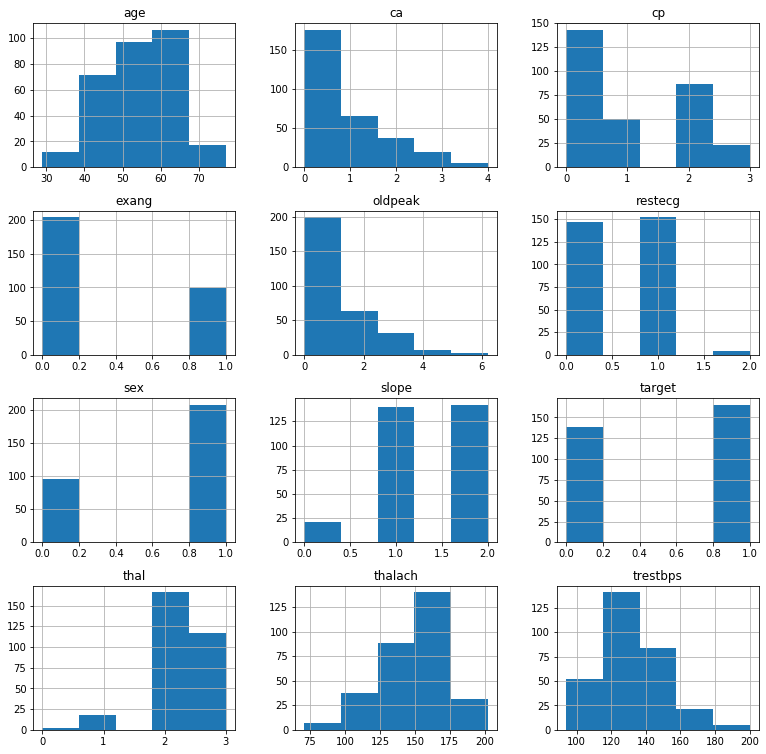

In [10]:
#distribution of each continous variables
a1=data.hist(bins=5,figsize=(13,13))
a1

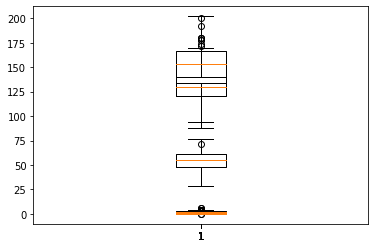

In [11]:
#to check if there are any outliers present or not
for i in data.columns:
    plt.boxplot(data[i])

There are very less outliers present in the data.

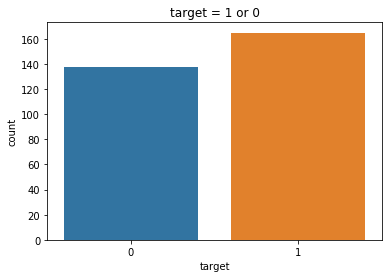

In [12]:
#countplot for the target variable
sns.countplot(x='target',data=data)
plt.title('target = 1 or 0');

In [13]:
"""#count plot between target and fasting blood sugar variables
sns.countplot(x='fbs',hue='target',data=data)
plt.xlabel('fbs')"""

"#count plot between target and fasting blood sugar variables\nsns.countplot(x='fbs',hue='target',data=data)\nplt.xlabel('fbs')"

we can see from above that fbs variable is not impacting the output variable.That's why we removed it

Text(0.5, 0, 'cp')

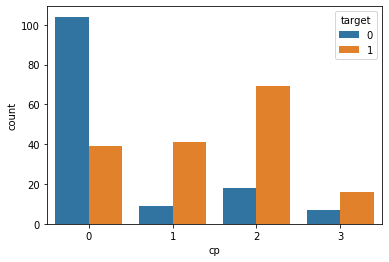

In [14]:
#countplot between target and chest pain type variables
sns.countplot(x='cp',hue='target',data=data)
plt.xlabel('cp')

Text(0.5, 0, 'exang')

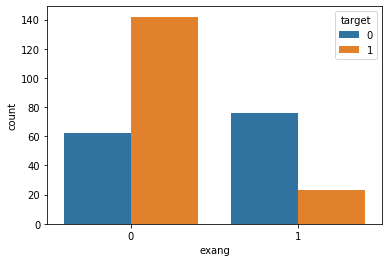

In [15]:
#countplot between exang and target variables
sns.countplot(x='exang',hue='target',data=data)
plt.xlabel('exang')

Text(0.5, 0, 'slope')

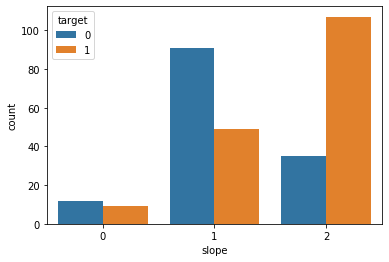

In [16]:
#countplot between slope and target variables
sns.countplot(x='slope',hue='target',data=data)
plt.xlabel('slope')

Text(0.5, 0, 'thal')

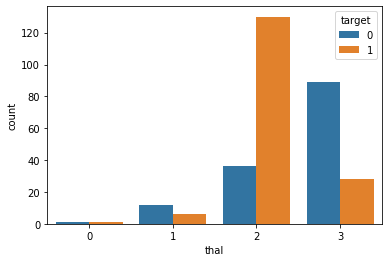

In [17]:
#countplot between thal and target variables
sns.countplot(x='thal',hue='target',data=data)
plt.xlabel('thal')

Text(0.5, 0, 'ca')

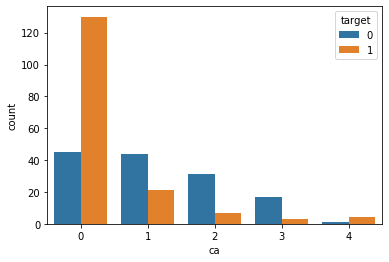

In [18]:
#countplot between ca and target variables
sns.countplot(x='ca',hue='target',data=data)
plt.xlabel('ca')

Text(0.5, 0, 'restecg')

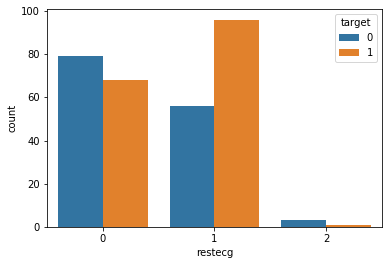

In [19]:
#countplot between restecg and target variables
sns.countplot(x='restecg',hue='target',data=data)
plt.xlabel('restecg')

From the above plot we can say that restecg have very less effect on the target variable.so we can remove this variable

Text(0.5, 0, 'sex')

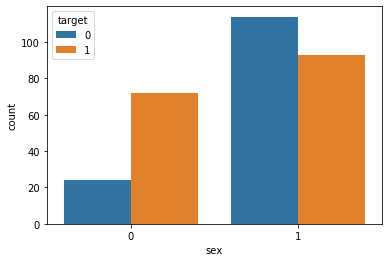

In [20]:
#countplot between sex and target variables
sns.countplot(x='sex',hue='target',data=data)
plt.xlabel('sex')

In [21]:
data=data.drop(['restecg'],axis=1)

# import library and spliting data 

In [22]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [23]:
x=data.drop(['target'],axis=1)
y=data.target

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state=5)

In [25]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(212, 10) (212,) (91, 10) (91,)


# 1)	Linear Regression

In [26]:
from sklearn import linear_model

In [27]:
#Train the model
lir= linear_model.LinearRegression()

In [28]:
#Fit the model
lir.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
#predicting the test values
pred=lir.predict(x_test)
pred

array([ 0.87359024, -0.16272442, -0.03668109,  0.36677001,  0.60192222,
        0.05265115,  0.62588224, -0.12508186,  1.01289882,  0.50703056,
        0.75874056, -0.08874353,  0.73370027,  0.98420601,  0.28540013,
        0.38635627,  0.46346801,  0.69085853,  0.904262  ,  0.21204843,
       -0.20395913,  0.12065868,  1.17923968,  0.12855946,  0.32625344,
        0.78800798,  0.65490023,  0.98225035,  1.22453457,  0.06858759,
        0.95264052,  0.80755308,  0.61525911,  0.69182896,  0.10758913,
        0.02986982,  0.87035775,  0.7311118 ,  0.34499983,  0.73810311,
        0.68599992,  0.14980822,  0.58153463, -0.180895  ,  0.20036612,
        0.17225928, -0.13822841,  0.13199392,  0.11898531, -0.19150022,
       -0.03438983,  0.6879803 ,  0.92434654,  0.75205441,  1.14254157,
        0.63629277,  0.68859395,  0.4972103 ,  0.55215003,  0.83508418,
        0.38782085,  0.22909109,  0.28364905,  0.61112035,  0.6131179 ,
        0.99545183, -0.20353183,  0.95630753,  0.83312576, -0.01

In [30]:
#Score/Accuracy
print("Accuracy --> ", lir.score(x_test, y_test)*100)

Accuracy -->  61.92080729355573


# 2) logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lor= LogisticRegression()

In [33]:
#Fit the model
lor.fit(x_train, y_train)

C:\Users\DEEPTHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
pred= lor.predict(x_test)
pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [35]:
#Score/Accuracy
print("Accuracy --> ", lor.score(x_test, y_test)*100)

Accuracy -->  92.3076923076923


# 3 ) Random Forest Regression

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
#Train the model
rmf = RandomForestRegressor(n_estimators=50)

In [38]:
#Fit
rmf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [39]:
pred=rmf.predict(x_test)
pred

array([0.76, 0.08, 0.04, 0.1 , 0.64, 0.04, 0.66, 0.06, 1.  , 0.9 , 1.  ,
       0.1 , 0.68, 0.94, 0.84, 0.24, 0.5 , 0.32, 0.94, 0.16, 0.  , 0.04,
       1.  , 0.08, 0.3 , 0.94, 0.74, 0.98, 0.94, 0.02, 0.7 , 1.  , 0.62,
       0.9 , 0.1 , 0.32, 0.96, 0.94, 0.16, 0.74, 0.62, 0.16, 0.4 , 0.08,
       0.34, 0.12, 0.  , 0.18, 0.14, 0.12, 0.12, 0.74, 0.84, 0.78, 1.  ,
       0.74, 0.6 , 0.5 , 0.56, 0.94, 0.24, 0.24, 0.04, 0.72, 0.78, 1.  ,
       0.14, 1.  , 1.  , 0.  , 0.42, 0.64, 1.  , 0.1 , 0.06, 1.  , 0.26,
       0.96, 0.52, 0.88, 1.  , 0.56, 0.98, 0.18, 0.56, 0.8 , 0.36, 0.22,
       1.  , 0.1 , 0.44])

In [40]:
#Score/Accuracy
print("Accuracy --> ", rmf.score(x_test, y_test)*100)

Accuracy -->  66.28238372093026


# 4) KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier(n_neighbors=25)

In [43]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [44]:
pred = knn.predict(x_test)
pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [45]:
#Score/Accuracy
print("Accuracy --> ", knn.score(x_test, y_test)*100)

Accuracy -->  79.12087912087912


# 5) decision tree 

In [46]:
from sklearn import tree

In [47]:
dt = tree.DecisionTreeClassifier()

In [48]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
pred = dt.predict(x_test)
pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [50]:
#Score/Accuracy
print("Accuracy --> ", dt.score(x_test, y_test)*100)

Accuracy -->  84.61538461538461


# 6) XGBoost

In [51]:
import xgboost as xgb

In [52]:
xgbreg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [53]:
xgbreg.fit(x_train,y_train)

[12:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, ...)

In [54]:
pred = xgbreg.predict(x_test)
pred

array([0.5655772 , 0.37817654, 0.43097332, 0.45890212, 0.53548306,
       0.39163673, 0.56340486, 0.39163673, 0.66000473, 0.59183466,
       0.5879089 , 0.42113215, 0.59183466, 0.66000473, 0.549524  ,
       0.47231784, 0.48763302, 0.55654   , 0.5339043 , 0.3879516 ,
       0.37817654, 0.39163673, 0.642622  , 0.41952106, 0.56118584,
       0.633042  , 0.56764764, 0.65167284, 0.58479446, 0.42113215,
       0.52485347, 0.66000473, 0.548879  , 0.5693591 , 0.44044584,
       0.46838456, 0.633042  , 0.6214987 , 0.43371   , 0.60058635,
       0.54810447, 0.44999185, 0.5762689 , 0.37817654, 0.54285747,
       0.42698565, 0.37817654, 0.40807107, 0.46994126, 0.41118917,
       0.43643257, 0.57963103, 0.5930236 , 0.5856556 , 0.66000473,
       0.57491666, 0.52485347, 0.49034542, 0.5929758 , 0.66000473,
       0.48763302, 0.5137035 , 0.43090722, 0.59183466, 0.59453595,
       0.6148717 , 0.37817654, 0.66000473, 0.66000473, 0.37817654,
       0.4766005 , 0.5771532 , 0.66000473, 0.4414145 , 0.38861

In [55]:
#Score/Accuracy
print("Accuracy --> ", xgbreg.score(x_test, y_test)*100)

Accuracy -->  26.68019726161156


# 7) naive-bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
gnb= GaussianNB()

In [58]:
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
pred=gnb.predict(x_test)
pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [60]:
#Score/Accuracy
print("Accuracy --> ",gnb.score(x_test, y_test)*100)

Accuracy -->  91.20879120879121


# 8) support vactor machine 

In [61]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svms= svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svms.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [62]:
#Predict the response for test dataset
pred = svms.predict(x_test)
pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [63]:
#Score/Accuracy
print("Accuracy --> ", svms.score(x_test, y_test)*100)

Accuracy -->  92.3076923076923
